In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer

In [12]:
train_data = pd.read_csv('train.csv',header = None)
train_labels = pd.read_csv('trainLabels.csv',header = None)
test_data =  pd.read_csv('test.csv',header = None)
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [13]:
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


In [14]:
x_train,x_test,y_train, y_test = train_test_split(train_data, train_labels, test_size=0.3, random_state=100)

In [15]:
#Random Forest
rf = RandomForestClassifier(n_estimators = 100, random_state = 99)
rf.fit(x_train, y_train.values.ravel())
y_pred = rf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Random Forest: %f' %acc)

#Logistic Regression
lr = LogisticRegression()
lr.fit(x_train,y_train.values.ravel())
y_pred = lr.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print('Logistic Regression: %f' %acc)

Random Forest: 0.856667
Logistic Regression: 0.810000


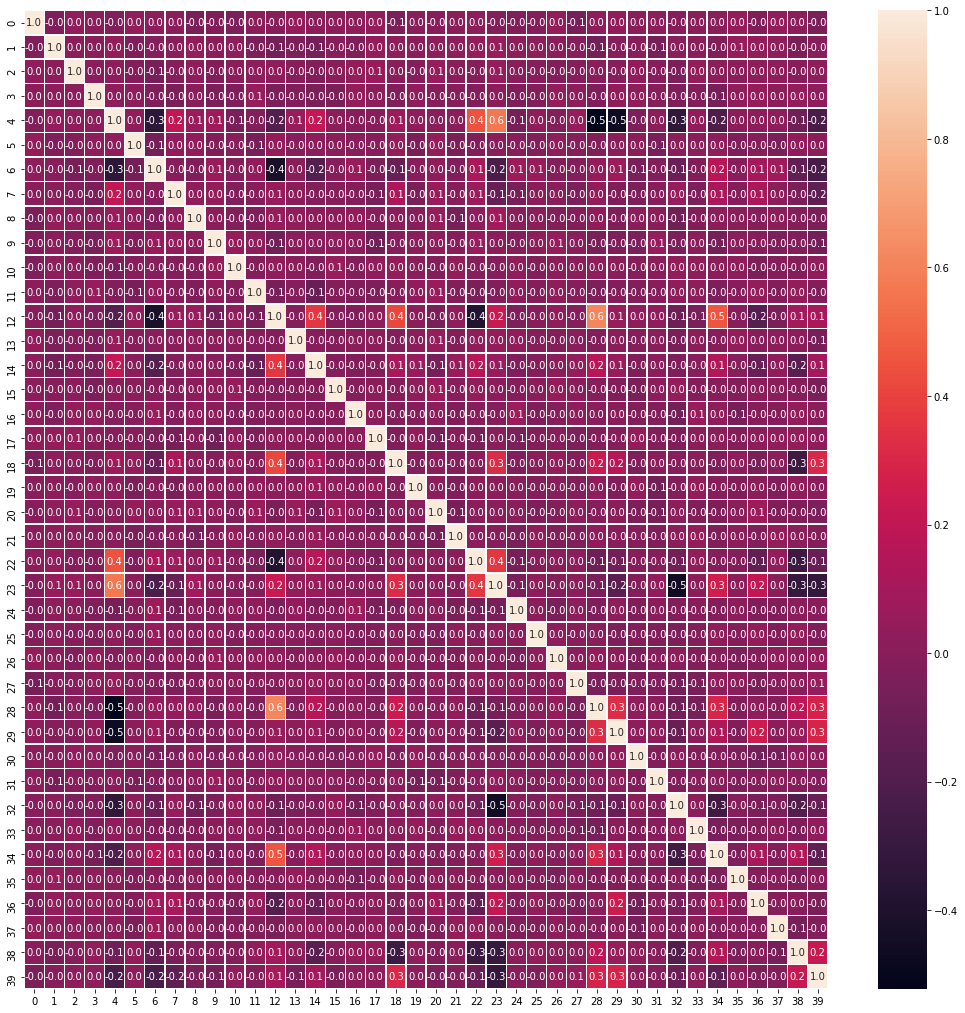

In [16]:
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(train_data.corr(), annot=True, fmt= '.1f', linewidths=.5)
plt.show()

In [17]:
norm = Normalizer()
norm_train_data = norm.fit_transform(train_data)

In [18]:
# Random Forest
rf = RandomForestClassifier(n_estimators = 100,random_state = 99)
print('Random Forest',cross_val_score(rf,norm_train_data, train_labels.values.ravel(), cv=5).mean())

# Logistic Regression
lr = LogisticRegression()
print('Logistic Regression',cross_val_score(lr,norm_train_data, train_labels.values.ravel(), cv=5).mean())

Random Forest 0.869
Logistic Regression 0.825


In [19]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=99)
# using grid research
n_estimators = [10, 50, 100, 200]
max_depth = [3, 10, 20]
param_grid = {
    "n_estimators": n_estimators,
    "max_depth": max_depth
}
grid_search = GridSearchCV(rf, param_grid, scoring="accuracy", n_jobs=-1)
grid_result = grid_search.fit(train_data, train_labels.values.ravel())
rf_best = grid_result.best_estimator_

print('Random Forest Best Score',grid_result.best_score_)
print('Random Forest Best Params',grid_result.best_params_)
print('Random Forest Accuracy',cross_val_score(rf_best, train_data, train_labels.values.ravel(), cv=10).mean())

Random Forest Best Score 0.867
Random Forest Best Params {'max_depth': 20, 'n_estimators': 100}
Random Forest Accuracy 0.8670000000000002


In [20]:
rf_best.fit(train_data, train_labels.values.ravel())
pred = rf_best.predict(test_data)
rf_best_pred = pd.DataFrame(pred)

rf_best_pred.index += 1

rf_best_pred.columns = ['Solution']
rf_best_pred['Id'] = np.arange(1,rf_best_pred.shape[0]+1)
rf_best_pred = rf_best_pred[['Id', 'Solution']]

rf_best_pred.to_csv('submission.csv',index=False)

![](./image.png)